# How are in-demand skills trending for Data Analysts?
Methology

- Aggregate skill counts monthly
- Re-analyze based on percentage of total jobs
- Plot the monthly skill demand


### 1. Importing Libraries and Data

In [5]:
# 1) import libraries & dataset
from datasets import load_dataset
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from adjustText import adjust_text
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# 2) format job_posted date in datetime (it was string)
df.job_posted_date = pd.to_datetime(df.job_posted_date)

# 3) add column job posted month to convert job posted datetime
df['job_posted_month'] = df.job_posted_date.dt.month

# 4) convert 'job_skills' into list
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

### 2. Aggregating skills by Month

In [ ]:
# Filtered df
df_da = df[(df['job_title_short'] == 'Data Analyst')&
        (df['job_country'] == 'United States')].copy()

# Explode skill column
df_da_explode = df_da.explode('job_skills')

# Pivoting by month number and assign it to a new df
df_pivot = df_da_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)

# Create total column in the pivot
df_pivot.loc['total'] = df_pivot.sum()

# Sorting by total count 
df_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending=False).index]

# Drop total column
df_pivot = df_pivot.drop('total')


job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


### 3. Re-analyze based on % of total jobs

In [25]:
# Group jobs by month
da_total = df_da.groupby('job_posted_month').size()

# Convert counts into percentages and assign to a new df
df_da_us_perc = df_pivot.div(da_total/100, axis=0) 

# Convert month number into month name
df_da_us_perc = df_da_us_perc.reset_index()
df_da_us_perc['month'] = df_da_us_perc['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_us_perc = df_da_us_perc.set_index('month')
df_da_us_perc = df_da_us_perc.drop(columns='job_posted_month')

df_da_us_perc

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 4. Plot the final Data Frame

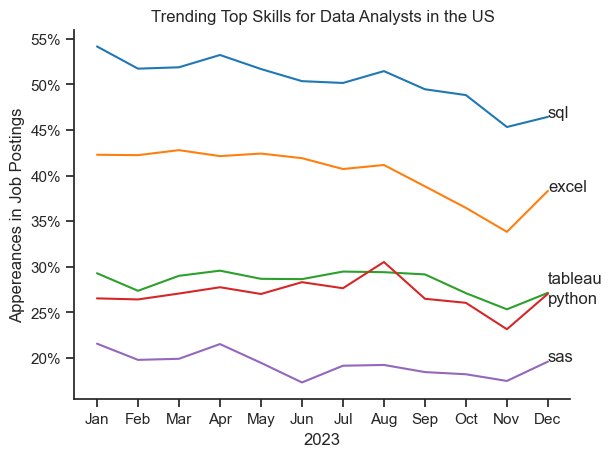

In [44]:
# Get only first 5 columns
df_plot = df_da_us_perc.iloc[:,:5]

#plot
sns.lineplot(data=df_plot, 
    dashes=False,
    palette='tab10'
)
sns.set_theme(style='ticks')
sns.despine()
plt.legend().remove()
plt.ylabel('Appereances in Job Postings')
plt.xlabel('2023')
plt.title('Trending Top Skills for Data Analysts in the US')

# Text on the chart
for i in range(2): # only 2 because 3rd and 4th value are on the same coordinate
    plt.text(11,df_plot.iloc[-1, i], df_plot.columns[i]) # set text based on the position in the data fram

plt.text(11, df_plot.iloc[-1, 2]+1, df_plot.columns[2])
plt.text(11, df_plot.iloc[-1, 3]-1, df_plot.columns[3])
plt.text(11, df_plot.iloc[-1, 4], df_plot.columns[4])

# Format Y axis as a percentage
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.show()